In [1]:
import pandas as pd

In [2]:
df_2 = pd.read_csv("../Data/black_box_2_data.csv")

In [7]:
import shap
import xgboost as xgb

model = xgb.XGBClassifier()
model.load_model('../Models/xgboost_model.json')

# Drop the 'Group' column
# df_2 = df_2.drop(columns=['Group'])

# Select features and target
X = df_2.drop(columns=['Default (y)', 'Pred_default (y_hat)', 'PD'])
y = df_2['PD']

 99%|===================| 7322/7430 [00:29<00:00]        

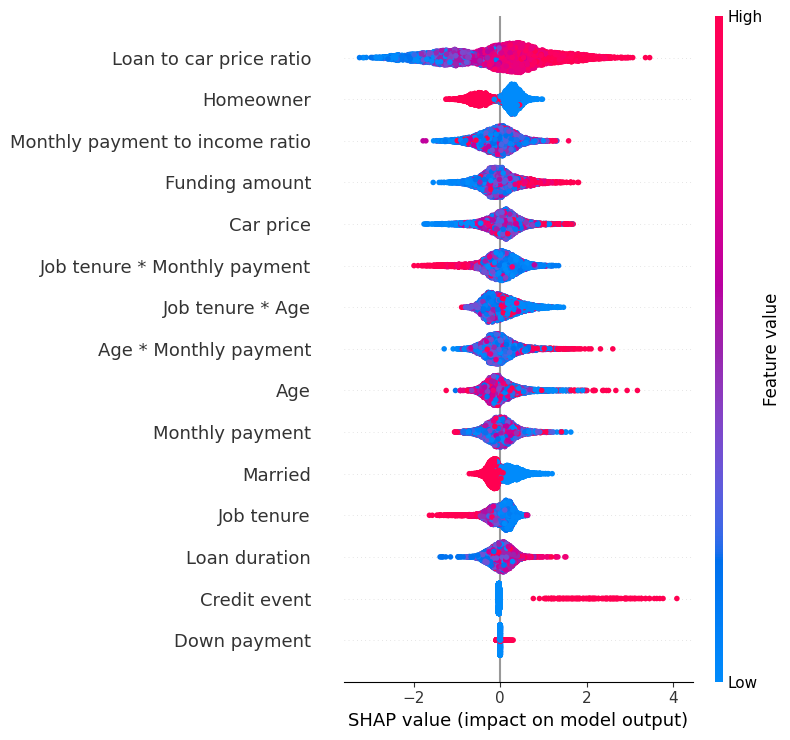

In [11]:
# Create a SHAP explainer that explains probabilities instead of log-odds
# Note: model.predict_proba returns probabilities, so we use that in SHAP explainer.
explainer = shap.Explainer(model, X, feature_perturbation="interventional", link=shap.links.logit)

# Calculate SHAP values for the predicted probabilities
shap_values = explainer(X)

# Plot SHAP summary (explaining contribution to predicted probabilities)
shap.summary_plot(shap_values, X)

# SHAP Summary Plot Interpretation

In the SHAP summary plot above, each dot represents the impact of a feature on the prediction for an individual sample. The plot displays how the feature values affect the model's output, which is a binary classification task (predicting loan default, where 0 is no default and 1 is default). Let's break down the interpretation:

## 1. X-axis (SHAP Value)
The SHAP value on the x-axis shows how much each feature contributes to increasing or decreasing the probability of loan default.  
- SHAP values to the left (negative) push the model's prediction towards no default (0), and SHAP values to the right (positive) push the model’s prediction towards default (1).

## 2. Y-axis (Features)
Features are ranked by their overall importance, with the most important features at the top. In this case:
- Loan to car price ratio is the most important feature affecting the prediction of loan default.
- Down payment is the least important feature in this context.

## 3. Color of Dots (Feature Value)
The color of each dot represents the feature value:
- **Red dots** represent higher values of the feature.
- **Blue dots** represent lower values of the feature.

## 4. Interpretation of Key Features
### Loan to car price ratio:
- Higher values (in red) increase the likelihood of loan default (positive SHAP values).
- Lower values (in blue) decrease the likelihood of loan default (negative SHAP values).

### Homeowner:
- Customers who own homes (higher values, shown in red) are associated with a decreased probability of loan default (SHAP values < 0).
- Non-homeowners (lower values, blue) are associated with an increased likelihood of default.

### Monthly payment to income ratio:
- A higher ratio of monthly payment to income (red) tends to increase the likelihood of default.
- A lower ratio (blue) reduces the likelihood of default.

### Funding amount and Car price:
- Higher funding amounts and car prices (red) generally push the model towards predicting default, indicating a positive correlation between these features and default risk.

### Job tenure * Monthly payment and Job tenure * Age (interaction terms):
- These interaction terms show that higher values (red) increase the probability of default, while lower values (blue) reduce it.

### Age:
- Younger individuals (blue dots) tend to have a higher likelihood of default, whereas older individuals (red) are associated with lower default probabilities.

### Credit event:
- A credit event (blue) significantly increases the likelihood of default, as indicated by the larger positive SHAP values.

### Down payment:
- Surprisingly, the down payment amount has minimal impact on the loan default prediction, as seen by the small SHAP values near zero.

## Conclusion
The SHAP plot helps to understand the key drivers of loan default predictions. Features like Loan to car price ratio, Homeownership, and Monthly payment to income ratio have significant impacts on the model’s predictions, with higher values of these features generally leading to a higher probability of default. On the other hand, lower values of features like Age and Job tenure increase the likelihood of default.

This plot provides insights into how the model makes predictions and which features most strongly influence those predictions, allowing for better interpretability and potentially helping with risk mitigation strategies.
